<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-STTP-on-Data-Analytics-with-Python/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('stackoverflow-developer-survey-2020')

 84%|████████▍ | 79355904/94603888 [00:04<00:00, 164172131.82it/s]


0it [00:00, ?it/s]
  0%|          | 0/8428 [00:00<?, ?it/s]



0it [00:00, ?it/s]

  0%|          | 0/2268 [00:00<?, ?it/s]

In [4]:
import os # package that help us to use command line command on python
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_schema.csv', 'README.txt', 'survey_results_public.csv']

In [5]:
!pip install pandas

In [7]:
import pandas as pd             # used for data related operation
import numpy as np              # used for numeric operation 
import matplotlib.pyplot as plt # used for graph
import seaborn as sns           # used for graph
%matplotlib inline 

In [34]:
# 1. Reading data
sodata = pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_public.csv')
schema = pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_schema.csv', index_col="Column").QuestionText

sodata.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [35]:
schema

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [14]:
# 1.Rows and Columns Count
sodata.shape

(64461, 61)

In [15]:
print(f"Rows: {sodata.shape[0]} Columns : {sodata.shape[1]}")

Rows: 64461 Columns : 61


In [17]:
# 2. Number of Columns
sodata.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [36]:
schema['LanguageWorkedWith']

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [42]:
# 3. check the datatypes of every columns
sodata.dtypes.to_frame('Data Types').T

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Data Types,int64,object,object,float64,object,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


,object,float64,int64
Count,56,4,1


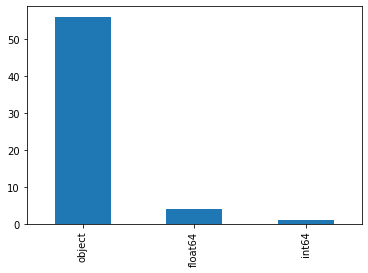

In [48]:
display(sodata.dtypes.value_counts().to_frame('Count').T)
sodata.dtypes.value_counts().plot(kind = 'bar')
plt.show()

### Data preparation & Cleaning

* Demographics of the survey respondents and global programming commnunity
* Distrbution of Programming skills, experience and preferences.
* Employent related information, preferences and opinions

In [56]:
selected_columns = [
                    # Demographics Columns
                    'Country',
                    'Age',
                    'Gender',
                    'EdLevel',
                    'UndergradMajor',
                    # Programming Experience
                    'Hobbyist',
                    'Age1stCode',
                    'YearsCode',
                    'YearsCodePro',
                    'LanguageWorkedWith',
                    'LanguageDesireNextYear',
                    'NEWLearn',
                    'NEWStuck',
                    # Employment
                    'Employment',
                    'DevType',
                    'WorkWeekHrs',
                    'JobSat',
                    'JobFactors',
                    'NEWOvertime',
                    'NEWEdImpt'
                    ]

In [57]:
len(selected_columns)

20

In [58]:
# select the column from survey dataset
survey = sodata[selected_columns].copy(deep=True)
survey.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [59]:
# Count of rows and columns
survey.shape

(64461, 20)

In [60]:
# Information about survey dataset
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [63]:
(survey.isnull().sum() / len(survey)) * 100

Country                    0.603466
Age                       29.498456
Gender                    21.569631
EdLevel                   10.905819
UndergradMajor            20.890151
Hobbyist                   0.069810
Age1stCode                10.178247
YearsCode                 10.513334
YearsCodePro              28.097609
LanguageWorkedWith        10.988039
LanguageDesireNextYear    16.053117
NEWLearn                  12.883759
NEWStuck                  14.703464
Employment                 0.941655
DevType                   23.411055
WorkWeekHrs               36.161400
JobSat                    29.889390
JobFactors                23.443633
NEWOvertime               32.934643
NEWEdImpt                 24.815004
dtype: float64

In [64]:
# datatypes conversion
survey["Age1stCode"] = pd.to_numeric(survey["Age1stCode"], errors='coerce')
survey["YearsCode"] = pd.to_numeric(survey["YearsCode"], errors='coerce')
survey["YearsCodePro"] = pd.to_numeric(survey["YearsCodePro"], errors='coerce')

In [68]:
survey.head(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important


In [72]:
# help(survey.describe)

In [73]:
survey.select_dtypes('float64').describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [85]:
# drop the rows which contains the age greater than 100 and less than 10
print(survey.shape[0])
survey.drop(survey[survey["Age"] < 10].index, inplace=True)
print(survey.shape[0])

64461
64452


In [88]:
print(survey.shape[0])
survey.drop(survey[survey["Age"] > 100].index, inplace=True)
print(survey.shape[0])

64452
64451


In [90]:
# Drop the rows which is contains the more than 140 hours in week
print(survey.shape[0])
survey.drop(survey[survey["WorkWeekHrs"] > 140].index, inplace=True)
print(survey.shape[0])

64451
64306


In [91]:
survey.shape

(64306, 20)

In [92]:
survey["Gender"].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [94]:
# handle the inconsistent missing value
survey.where(~(survey["Gender"].str.contains(';', na=False)), np.nan, inplace=True)

In [100]:
# help(survey["Gender"].value_counts)

In [101]:
survey["Gender"].value_counts(dropna=False)

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [102]:
survey.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
11786,Spain,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,10.0,NaN,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Java;JavaScript;Python,Every few months,Meditate;Visit Stack Overflow;Go for a walk or...,Employed full-time,"Designer;DevOps specialist;Engineer, data;Engi...",40.0,Very dissatisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Critically important
55742,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
55120,Italy,20.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,15.0,4.0,NaN,C++;Java;JavaScript;PHP;Python,Java;JavaScript;Python,Once a year,Meditate;Visit Stack Overflow;Watch help / tut...,Student,NaN,NaN,NaN,"Industry that I’d be working in;Languages, fra...",NaN,NaN
46542,Germany,49.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,22.0,HTML/CSS;JavaScript;SQL;TypeScript,Java;JavaScript;Python;SQL;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, full-stack",40.0,Slightly satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Fairly important
14351,Denmark,26.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,18.0,5.0,NaN,C#;C++;Objective-C;PHP;SQL,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Specific depa...,Rarely: 1-2 days per year or less,Not at all important/not necessary
49257,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,NaN,6.0,2.0,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
16378,India,19.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,16.0,2.0,NaN,Bash/Shell/PowerShell;C;C++;Java;Python;SQL,C#;Go;Haskell;JavaScript;Kotlin;Ruby;Swift,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
12322,Sweden,37.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",No,18.0,15.0,13.0,C;Python;VBA,C#;C++;Python;VBA,Once every few years,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,NaN,40.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Rarely: 1-2 days per year or less,Somewhat important
20729,Pakistan,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,7.0,5.0,C#;Objective-C;PHP;SQL;Swift,Dart;Kotlin;Python;Ruby,Every few months,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, embedded applications or devices;De...",45.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Often: 1-2 days per week or more,Very important
31083,Bulgaria,NaN,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,10.0,11.0,3.0,C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL,C#;C++,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Designer;Developer, back-end;Developer, deskto...",NaN,Very satisfied,Industry that I’d be working in;Specific depar...,Occasionally: 1-2 days per quarter but less th...,Somewhat important


### Exploration data analysis

In [103]:
survey.head(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important


In [141]:
import matplotlib
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

### Country Analysis - Univariate Analysis

In [104]:
schema.Country

'Where do you live?'

In [105]:
survey.Country.nunique()

183

In [113]:
top_countries = survey["Country"].value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

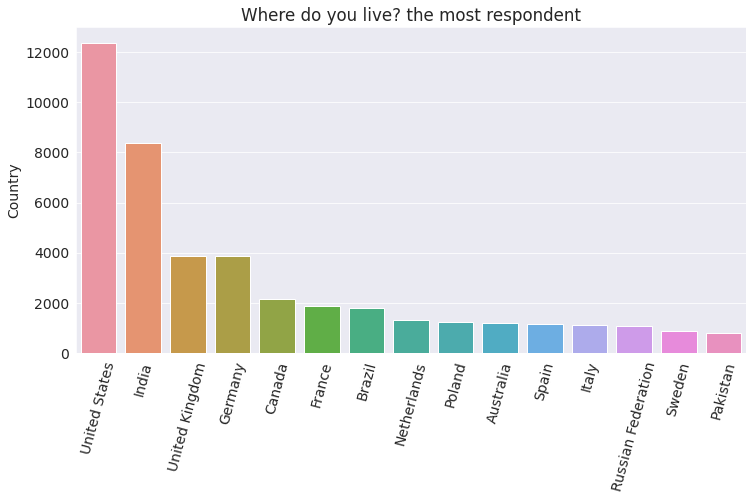

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y = top_countries)
plt.xticks(rotation = 75)
plt.title(F"{schema.Country} the most respondent")
plt.show()

In [119]:
lowest_countries = survey["Country"].value_counts().tail(15)
lowest_countries

Monaco                                2
Fiji                                  1
Micronesia, Federated States of...    1
Nauru                                 1
Saint Lucia                           1
Chad                                  1
Gabon                                 1
Mali                                  1
Marshall Islands                      1
Lesotho                               1
Antigua and Barbuda                   1
North Korea                           1
Kiribati                              1
Grenada                               1
Liechtenstein                         1
Name: Country, dtype: int64

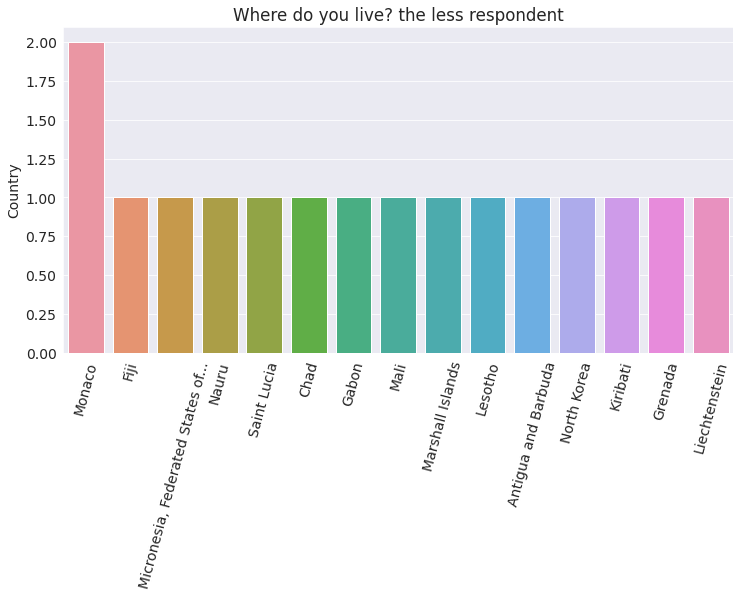

In [121]:
plt.figure(figsize=(12,6))
sns.barplot(x=lowest_countries.index, y = lowest_countries)
plt.xticks(rotation = 75)
plt.title(F"{schema.Country} the less respondent")
plt.show()

### Age

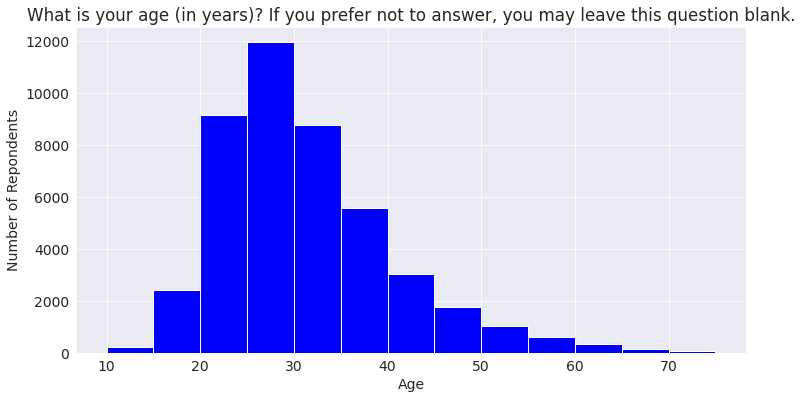

In [126]:
plt.figure(figsize=(12,6))
plt.hist(survey["Age"], bins=np.arange(10,80,5), color="blue")
plt.xlabel("Age")
plt.ylabel("Number of Repondents")
plt.title(schema.Age)
plt.show()

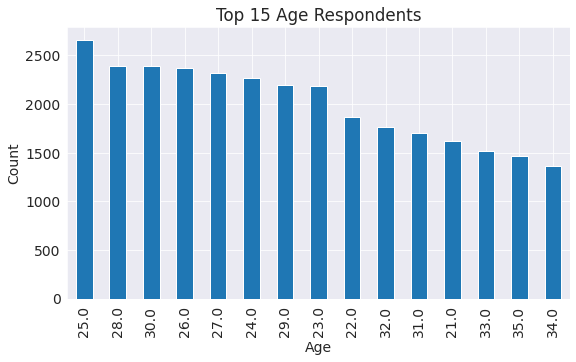

In [131]:
survey["Age"].value_counts().head(15).plot(kind="bar", 
                                           xlabel="Age", 
                                           ylabel="Count", 
                                           title="Top 15 Age Respondents")
plt.show()

### Gender

In [132]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [153]:
gender_counts = survey.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

Man                                                  71.369701
Woman                                                 5.963674
Non-binary, genderqueer, or gender non-conforming     0.598700
Name: Gender, dtype: float64

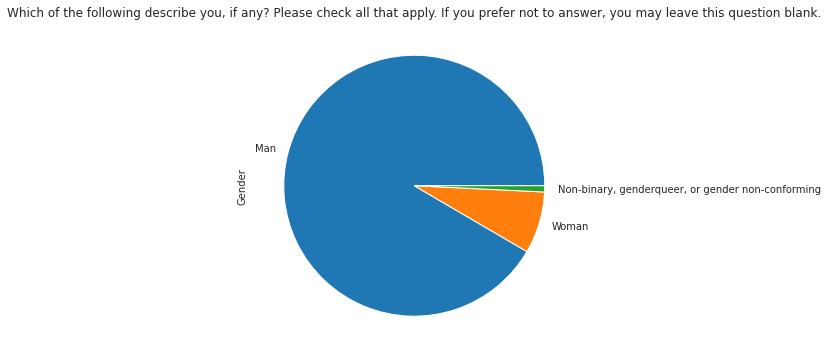

In [163]:
display((gender_counts/len(survey)) * 100)
gender_counts.plot(kind="pie", figsize=(12,6), title=schema.Gender)
plt.show()

# gender_counts.plot.pie(autopct=lambda x: '{:.0f}'.format(survey.Gender.value_counts().sum()/100))

### Education Level

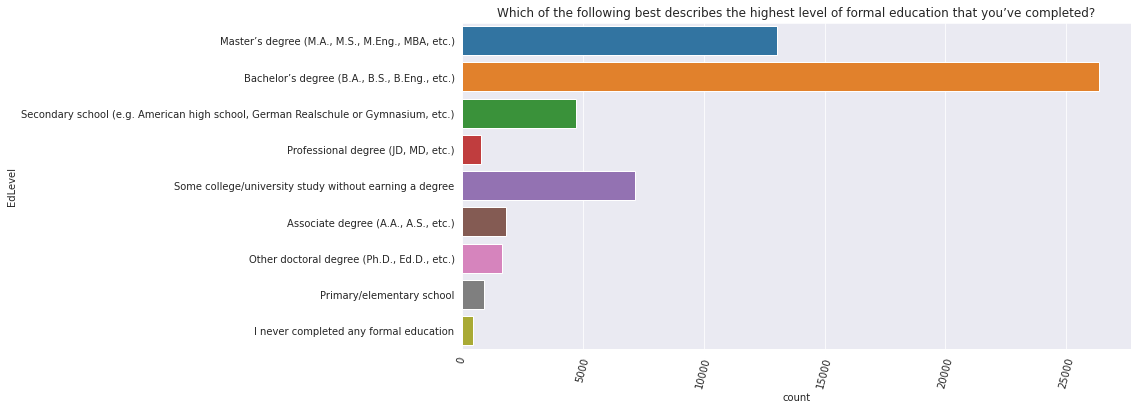

In [165]:
plt.figure(figsize=(12,6))
sns.countplot(y=survey.EdLevel)
plt.xticks(rotation = 75)
plt.title(F"{schema.EdLevel}")
plt.show()

### UndergradMajor

In [166]:
schema.UndergradMajor

'What was your primary field of study?'

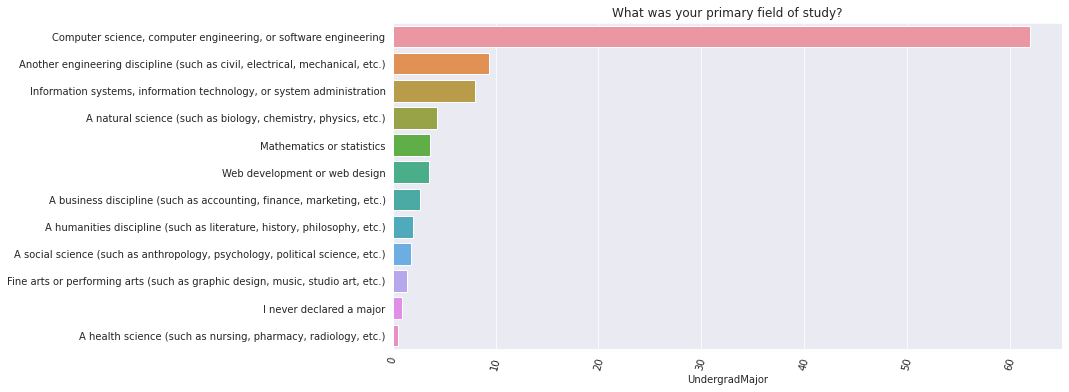

In [170]:
pct = survey.UndergradMajor.value_counts() * 100 / survey.UndergradMajor.count()

plt.figure(figsize=(12,6))
sns.barplot(x=pct,y=pct.index)
plt.xticks(rotation = 75)
plt.title(f"{schema.UndergradMajor}")
plt.show()

### Employment

In [171]:
schema.Employment

'Which of the following best describes your current employment status?'

In [176]:
survey.Employment.value_counts(normalize=True, ascending=False) * 100

Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: Employment, dtype: float64

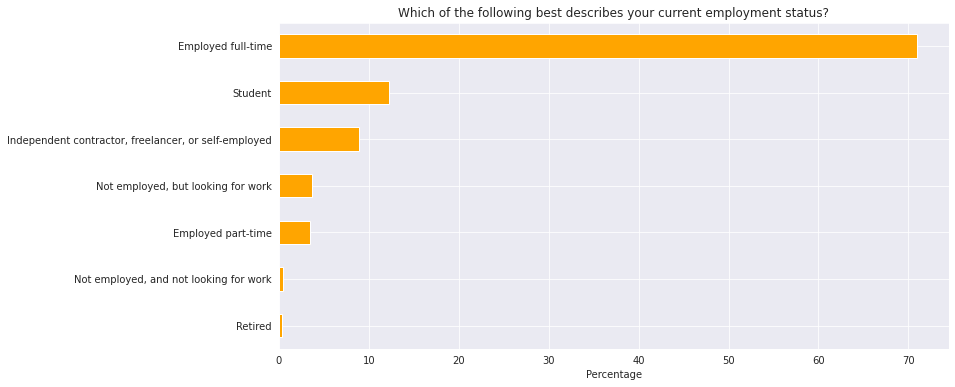

In [173]:
(survey.Employment.value_counts(normalize=True, ascending=True) * 100).plot(kind="barh", color="orange", figsize=(12,6))
plt.title(schema.Employment)
plt.xlabel("Percentage")
plt.show()

### Devtype

In [177]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [179]:
survey.DevType.value_counts().head(15)

Developer, full-stack                                                                                           4396
Developer, back-end                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                  2214
Developer, back-end;Developer, full-stack                                                                       1465
Developer, front-end                                                                                            1390
Developer, mobile                                                                                               1247
Developer, front-end;Developer, full-stack                                                                       822
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack     809
Developer, back-end;Developer, desktop or enterprise application

In [ ]:
[Developer, back-end, Developer, desktop or enterprise applications, Developer, full-stack]

In [183]:
def split_multicolumns(col_series):
  result_df = col_series.to_frame()
  options = []

  # iterate over the column
  for idx, value in col_series[col_series.notnull()].iteritems():
    for option in value.split(';'):
      if not option in result_df.columns:
        options.append(option)
        result_df[option] = False
      # mark the true value in the option column as true
      result_df.at[idx, option] = True
  return result_df[options]

In [185]:
dev_result = split_multicolumns(survey.DevType)

In [187]:
result_dev_new = dev_result.sum().sort_values(ascending=False)

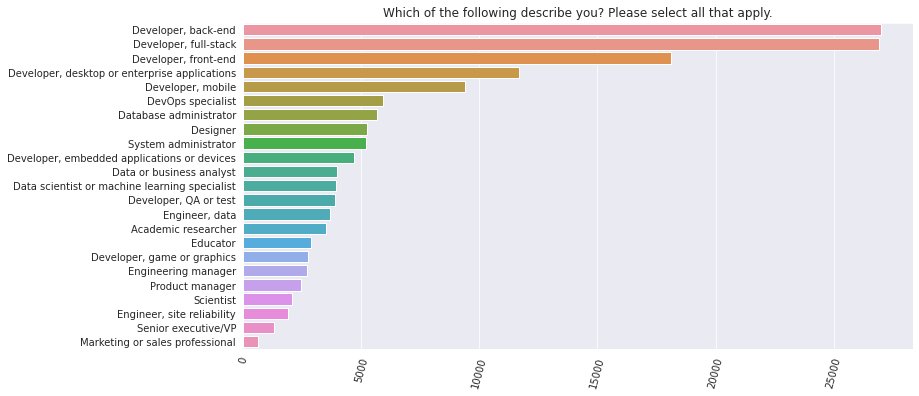

In [189]:
plt.figure(figsize=(12,6))
sns.barplot(x=result_dev_new,y=result_dev_new.index)
plt.xticks(rotation = 75)
plt.title(f"{schema.DevType}")
plt.show()

### Language Work with 

In [190]:
survey.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [191]:
lang_work_with = split_multicolumns(survey.LanguageWorkedWith)

In [194]:
lang_work_with

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,C,TypeScript,Bash/Shell/PowerShell,Kotlin,R,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [196]:
popu_lang = lang_work_with.mean().sort_values(ascending=False) * 100

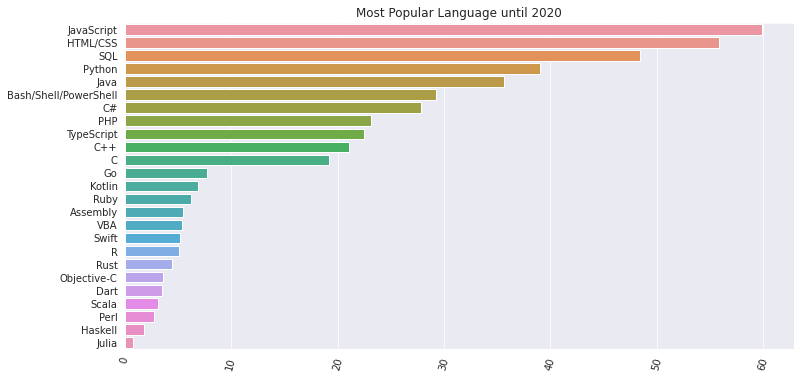

In [197]:
plt.figure(figsize=(12,6))
sns.barplot(x=popu_lang,y=popu_lang.index)
plt.xticks(rotation = 75)
plt.title(f"Most Popular Language until 2020")
plt.show()

### Language Most people interested to Learn next year?

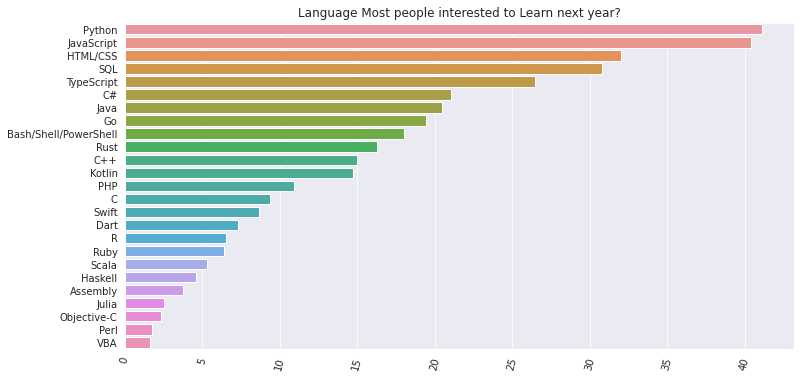

In [200]:
lang_inter_df = split_multicolumns(survey.LanguageDesireNextYear)
popu_lang_inter = lang_inter_df.mean().sort_values(ascending=False) * 100
plt.figure(figsize=(12,6))
sns.barplot(x=popu_lang_inter,y=popu_lang_inter.index)
plt.xticks(rotation = 75)
plt.title(f"Language Most people interested to Learn next year?")
plt.show()

### Which are the most loved language ?

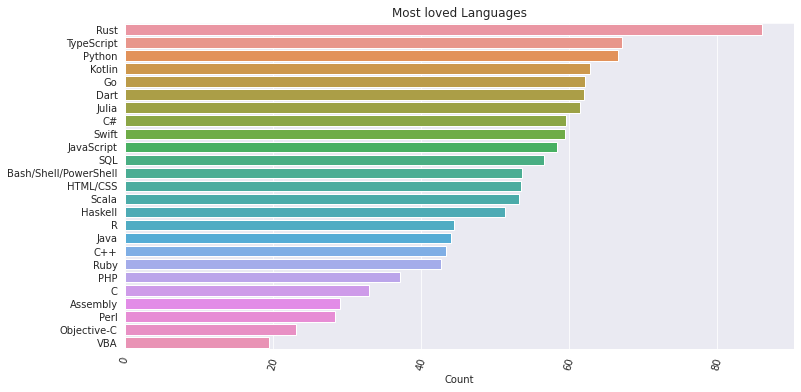

In [204]:
lang_love_df = lang_work_with & lang_inter_df
lang_love_percentage = (lang_love_df.sum() * 100 / lang_work_with.sum()).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=lang_love_percentage,y=lang_love_percentage.index)
plt.xticks(rotation = 75)
plt.title(f"Most loved Languages")
plt.xlabel("Count")
plt.show()

### Highest Number of hours developer is working by Country

In [205]:
country_df = survey.groupby("Country")[["WorkWeekHrs"]].mean().sort_values('WorkWeekHrs', ascending=False)

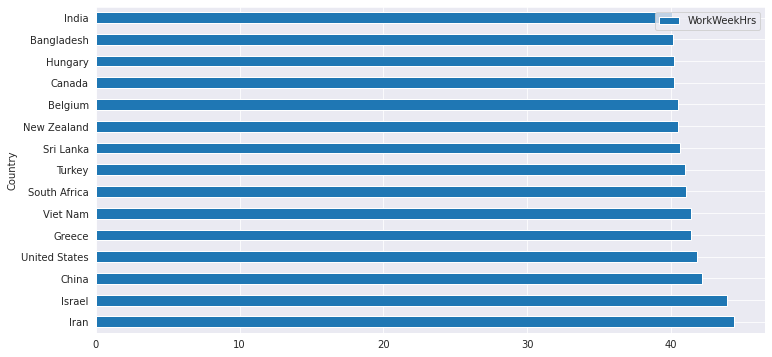

In [209]:
high_response_df = country_df.loc[survey.Country.value_counts() > 250].head(15)
high_response_df.plot(kind="barh", figsize=(12,6))
plt.show()

### How important is it to start young to build a career in programming?

In [210]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

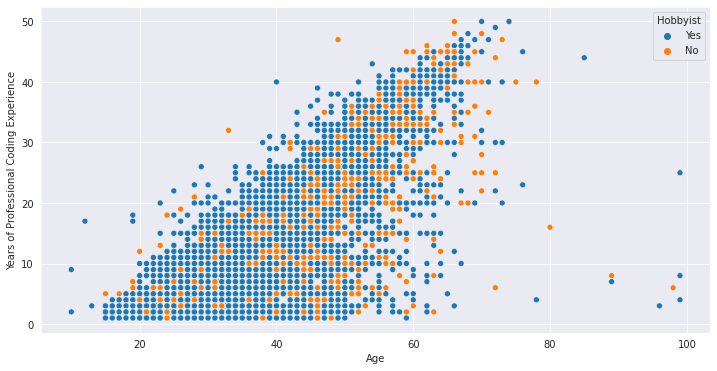

In [212]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Age", y="YearsCodePro", hue="Hobbyist", data = survey)
plt.xlabel("Age")
plt.ylabel("Years of Professional Coding Experience")
plt.show()

### Age1stCode

In [213]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

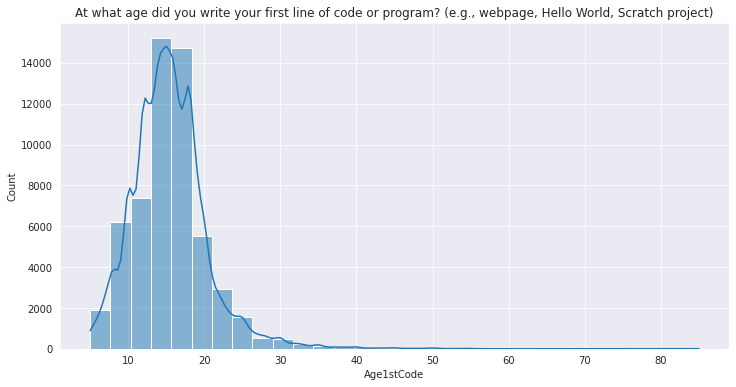

In [215]:
plt.figure(figsize=(12,6))
sns.histplot(survey.Age1stCode, bins=30, kde=True)
plt.title(schema.Age1stCode)
plt.show()